In [1]:
# Import Libraries 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# Network dimensions 
in_features = 2   #Input Features 
hid_features = 10 #Hidden Features
out_features = 2  #Output Features 

# Training Parameters 
learning_rate = 5e-1 
optim_steps = 150 

In [3]:
# Create a torch model with 1 hidden layer 

class Net(nn.Module):
    
    def __init__(self, in_features, hidden_dim, out_features):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(in_features, hidden_dim)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_dim, out_features)
        
    def forward(self, x):     
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

# Declare an instance of the network

model = Net(in_features,hid_features,out_features)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), learning_rate) 

In [4]:
# Inputs and true one-hot encoded labels 

x_xor = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_xor = torch.tensor([[1, 0], [0, 1], [0, 1], [1, 0]], dtype=torch.float32) # one-hot encoded

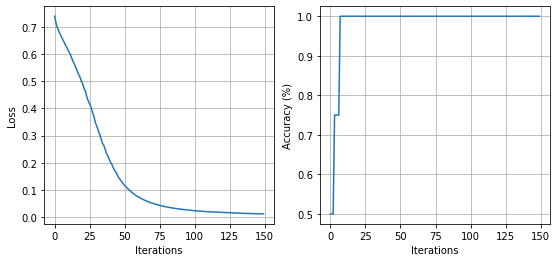

In [5]:
# Training loop 

losses = []
accs = []

for i in range(optim_steps):
    
    optimizer.zero_grad()
    y_pred = model.forward(x_xor)
    loss = criterion(y_pred,y_xor)
    losses.append(loss.detach().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    correct = torch.argmax(y_pred, axis=1) == torch.argmax(y_xor, axis=1)
    accs.append(torch.sum(correct)/len(y_pred))
    
# Plot loss and accuracy
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(losses)
plt.grid()

plt.subplot(1,3,2)
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.plot(accs)
plt.grid()

In [6]:
print(x_xor)
res = model(x_xor)
correct = torch.argmax(res, axis=1)
correct

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


tensor([0, 1, 1, 0])